# Overview of Pandas and Xarray groupby(), resample()

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline


## Get some data : tornado reports

## read the csv file - check out the options

In [2]:
d = pd.read_csv('1950-2016_all_tornadoes.csv', delimiter=',', header=0)
d.head()

om    yr  mo  dy    date      time  timezone state  stateFIPS  StateNumber  \
0   1  1950   1   3  1/3/50  11:00:00         3    MO         29            1   
1   1  1950   1   3  1/3/50  11:00:00         3    MO         29            1   
2   1  1950   1   3  1/3/50  11:10:00         3    IL         17            1   
3   2  1950   1   3  1/3/50  11:55:00         3    IL         17            2   
4   3  1950   1   3  1/3/50  16:00:00         3    OH         39            1   

  ...  lenghtmiles  widthyards  ns  sn  sg  fips1  fips2  fips3  fips4  fc  
0 ...          9.5       150.0   2   0   1      0      0      0      0   0  
1 ...          6.2       150.0   2   1   2    189      0      0      0   0  
2 ...          3.3       100.0   2   1   2    119      0      0      0   0  
3 ...          3.6       130.0   1   1   1    135      0      0      0   0  
4 ...          0.1        10.0   1   1   1    161      0      0      0   0  

[5 rows x 29 columns]

In [3]:
type(d)

pandas.core.frame.DataFrame

In [4]:
pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)
Docstring:
Read CSV (comma-separated) file

### I can tell read_csv to parse some columns and create a time index

In [5]:
d = pd.read_csv('1950-2016_all_tornadoes.csv', 
                delimiter=',',
                header=0,
                error_bad_lines=False, 
                parse_dates=[[1,2,3,5]], keep_date_col=True)
d.head()

yr_mo_dy_time  om    yr mo dy    date      time  timezone state  \
0 1950-01-03 11:00:00   1  1950  1  3  1/3/50  11:00:00         3    MO   
1 1950-01-03 11:00:00   1  1950  1  3  1/3/50  11:00:00         3    MO   
2 1950-01-03 11:10:00   1  1950  1  3  1/3/50  11:10:00         3    IL   
3 1950-01-03 11:55:00   2  1950  1  3  1/3/50  11:55:00         3    IL   
4 1950-01-03 16:00:00   3  1950  1  3  1/3/50  16:00:00         3    OH   

   stateFIPS ...  lenghtmiles  widthyards  ns  sn  sg  fips1  fips2  fips3  \
0         29 ...          9.5       150.0   2   0   1      0      0      0   
1         29 ...          6.2       150.0   2   1   2    189      0      0   
2         17 ...          3.3       100.0   2   1   2    119      0      0   
3         17 ...          3.6       130.0   1   1   1    135      0      0   
4         39 ...          0.1        10.0   1   1   1    161      0      0   

   fips4  fc  
0      0   0  
1      0   0  
2      0   0  
3      0   0  
4      0   0  

[5 rows x 30 columns]

### Useful commands to always run to check on how the data were loaded

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62208 entries, 0 to 62207
Data columns (total 30 columns):
yr_mo_dy_time    62208 non-null datetime64[ns]
om               62208 non-null int64
yr               62208 non-null object
mo               62208 non-null object
dy               62208 non-null object
date             62208 non-null object
time             62208 non-null object
timezone         62208 non-null int64
state            62208 non-null object
stateFIPS        62208 non-null int64
StateNumber      62208 non-null int64
EFscale          62208 non-null int64
injuries         62208 non-null int64
fatalities       62208 non-null int64
loss             62208 non-null float64
croploss         62208 non-null float64
startlat         62208 non-null float64
startlon         62208 non-null float64
endlat           62208 non-null float64
endlon           62208 non-null float64
lenghtmiles      62208 non-null float64
widthyards       62208 non-null float64
ns               62208 n

#### some of the variables were loaded as objects although - except for the state name - they are all numbers.
#### quick way to convert them is the following ( I will get an error because indeed the state names can't be converted)

In [7]:
d = d.convert_objects(convert_numeric=True)
d.info()

/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62208 entries, 0 to 62207
Data columns (total 30 columns):
yr_mo_dy_time    62208 non-null datetime64[ns]
om               62208 non-null int64
yr               62208 non-null int64
mo               62208 non-null int64
dy               62208 non-null int64
date             62208 non-null object
time             62208 non-null object
timezone         62208 non-null int64
state            62208 non-null object
stateFIPS        62208 non-null int64
StateNumber      62208 non-null int64
EFscale          62208 non-null int64
injuries         62208 non-null int64
fatalities       62208 non-null int64
loss             62208 non-null float64
croploss         62208 non-null float64
startlat         62208 non-null float64
startlon         62208 non-null float64
endlat           62208 non-null float64
endlon           62208 non-null float64
lenghtmiles      62208 non-null float64
widthyards       62208 non-null float64
ns               62208 non-

#### .describe() gives an overview of the data
#### look at EFscale

In [8]:
d.describe()

om            yr            mo            dy      timezone  \
count   62208.000000  62208.000000  62208.000000  62208.000000  62208.000000   
mean    50792.725244   1988.445377      5.958333     15.920203      3.001061   
std    148896.678355     18.030652      2.399363      8.753624      0.076066   
min         1.000000   1950.000000      1.000000      1.000000      0.000000   
25%       250.000000   1974.000000      4.000000      8.000000      3.000000   
50%       517.000000   1991.000000      6.000000     16.000000      3.000000   
75%       870.000000   2004.000000      7.000000     24.000000      3.000000   
max    614471.000000   2016.000000     12.000000     31.000000      9.000000   

          stateFIPS   StateNumber       EFscale      injuries    fatalities  \
count  62208.000000  62208.000000  62208.000000  62208.000000  62208.000000   
mean      29.325971     25.890143      0.810041      1.727045      0.110420   
std       15.013906     32.480651      0.958461     21.132596      1.673987   
min        1.000000      0.000000     -9.000000      0.000000      0.000000   
25%       18.000000      4.000000      0.000000      0.000000      0.000000   
50%       29.000000     14.000000      1.000000      0.000000      0.000000   
75%       45.000000     35.000000      1.000000      0.000000      0.000000   
max       72.000000    232.000000      5.000000   1740.000000    158.000000   

           ...        lenghtmiles    widthyards            ns            sn  \
count      ...       62208.000000  62208.000000  62208.000000  62208.000000   
mean       ...           3.626159    103.031928      1.024852      0.990226   
std        ...           8.843966    204.301575      0.160355      0.098378   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.100000     17.000000      1.000000      1.000000   
50%        ...           0.700000     40.000000      1.000000      1.000000   
75%        ...           3.000000    100.000000      1.000000      1.000000   
max        ...         234.700000   4576.000000      3.000000      1.000000   

                 sg         fips1         fips2         fips3         fips4  \
count  62208.000000  62208.000000  62208.000000  62208.000000  62208.000000   
mean       0.996367    105.268727      8.599794      1.814702      0.601257   
std        0.460527     97.079779     37.876581     17.122493      9.875327   
min       -9.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000     39.000000      0.000000      0.000000      0.000000   
50%        1.000000     85.000000      0.000000      0.000000      0.000000   
75%        1.000000    137.000000      0.000000      0.000000      0.000000   
max        2.000000    810.000000    810.000000    710.000000    507.000000   

                 fc  
count  62208.000000  
mean       0.029964  
std        0.170489  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 26 columns]

#### Accessing columns/rows can be simple or tricky depending on how complicated it is.
#### In general, columns can be accessed "attribute style" or through the key names
Attribute style

In [9]:
d.EFscale.head()

0    3
1    3
2    3
3    3
4    1
Name: EFscale, dtype: int64

keys

In [10]:
d.keys()

Index(['yr_mo_dy_time', 'om', 'yr', 'mo', 'dy', 'date', 'time', 'timezone',
       'state', 'stateFIPS', 'StateNumber', 'EFscale', 'injuries',
       'fatalities', 'loss', 'croploss', 'startlat', 'startlon', 'endlat',
       'endlon', 'lenghtmiles', 'widthyards', 'ns', 'sn', 'sg', 'fips1',
       'fips2', 'fips3', 'fips4', 'fc'],
      dtype='object')

In [11]:
d['EFscale'].head()

0    3
1    3
2    3
3    3
4    1
Name: EFscale, dtype: int64

#### let's tell python to exclude those negative EFscale

In [12]:
d = d[d.EFscale>-1]

d.describe()

om            yr            mo            dy      timezone  \
count   62178.000000  62178.000000  62178.000000  62178.000000  62178.000000   
mean    50520.979076   1988.432082      5.958474     15.919602      3.001061   
std    148417.614555     18.024837      2.399709      8.753490      0.076084   
min         1.000000   1950.000000      1.000000      1.000000      0.000000   
25%       250.000000   1974.000000      4.000000      8.000000      3.000000   
50%       517.000000   1991.000000      6.000000     16.000000      3.000000   
75%       869.000000   2004.000000      7.000000     24.000000      3.000000   
max    614471.000000   2016.000000     12.000000     31.000000      9.000000   

          stateFIPS   StateNumber       EFscale      injuries    fatalities  \
count  62178.000000  62178.000000  62178.000000  62178.000000  62178.000000   
mean      29.325710     25.902634      0.814774      1.727878      0.110473   
std       15.012725     32.483506      0.934149     21.137659      1.674389   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.000000      4.000000      0.000000      0.000000      0.000000   
50%       29.000000     14.000000      1.000000      0.000000      0.000000   
75%       45.000000     35.000000      1.000000      0.000000      0.000000   
max       72.000000    232.000000      5.000000   1740.000000    158.000000   

           ...        lenghtmiles    widthyards            ns            sn  \
count      ...       62178.000000  62178.000000  62178.000000  62178.000000   
mean       ...           3.627471    103.054202      1.024864      0.990222   
std        ...           8.845853    204.345808      0.160393      0.098402   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.100000     17.000000      1.000000      1.000000   
50%        ...           0.700000     40.000000      1.000000      1.000000   
75%        ...           3.010000    100.000000      1.000000      1.000000   
max        ...         234.700000   4576.000000      3.000000      1.000000   

                 sg         fips1         fips2         fips3         fips4  \
count  62178.000000  62178.000000  62178.000000  62178.000000  62178.000000   
mean       0.996365    105.278989      8.603944      1.815578      0.601547   
std        0.460638     97.077700     37.885247     17.126577      9.877700   
min       -9.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000     39.000000      0.000000      0.000000      0.000000   
50%        1.000000     85.000000      0.000000      0.000000      0.000000   
75%        1.000000    137.000000      0.000000      0.000000      0.000000   
max        2.000000    810.000000    810.000000    710.000000    507.000000   

                 fc  
count  62178.000000  
mean       0.029978  
std        0.170529  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 26 columns]

In [13]:
d= d[d['sg']==1]
d.startlat.describe()

count    61062.000000
mean        37.159091
std          5.123198
min         18.130000
25%         33.245400
50%         37.100000
75%         40.970000
max         61.020000
Name: startlat, dtype: float64

### let's rename the date column

In [14]:
d = d.rename(index=str, columns={"yr_mo_dy_time": "date_time"})
d.head()

date_time  om    yr  mo  dy     date      time  timezone state  \
0 1950-01-03 11:00:00   1  1950   1   3   1/3/50  11:00:00         3    MO   
3 1950-01-03 11:55:00   2  1950   1   3   1/3/50  11:55:00         3    IL   
4 1950-01-03 16:00:00   3  1950   1   3   1/3/50  16:00:00         3    OH   
5 1950-01-13 05:25:00   4  1950   1  13  1/13/50   5:25:00         3    AR   
6 1950-01-25 19:30:00   5  1950   1  25  1/25/50  19:30:00         3    MO   

   stateFIPS ...  lenghtmiles  widthyards  ns  sn  sg  fips1  fips2  fips3  \
0         29 ...          9.5       150.0   2   0   1      0      0      0   
3         17 ...          3.6       130.0   1   1   1    135      0      0   
4         39 ...          0.1        10.0   1   1   1    161      0      0   
5          5 ...          0.6        17.0   1   1   1    113      0      0   
6         29 ...          2.3       300.0   1   1   1     93      0      0   

   fips4  fc  
0      0   0  
3      0   0  
4      0   0  
5      0   0  
6      0   0  

[5 rows x 30 columns]

### let's use the date_time column as an index

In [15]:
d.set_index(keys='date_time', inplace=True)
d.head()

om    yr  mo  dy     date      time  timezone state  \
date_time                                                                  
1950-01-03 11:00:00   1  1950   1   3   1/3/50  11:00:00         3    MO   
1950-01-03 11:55:00   2  1950   1   3   1/3/50  11:55:00         3    IL   
1950-01-03 16:00:00   3  1950   1   3   1/3/50  16:00:00         3    OH   
1950-01-13 05:25:00   4  1950   1  13  1/13/50   5:25:00         3    AR   
1950-01-25 19:30:00   5  1950   1  25  1/25/50  19:30:00         3    MO   

                     stateFIPS  StateNumber ...  lenghtmiles  widthyards  ns  \
date_time                                   ...                                
1950-01-03 11:00:00         29            1 ...          9.5       150.0   2   
1950-01-03 11:55:00         17            2 ...          3.6       130.0   1   
1950-01-03 16:00:00         39            1 ...          0.1        10.0   1   
1950-01-13 05:25:00          5            1 ...          0.6        17.0   1   
1950-01-25 19:30:00         29            2 ...          2.3       300.0   1   

                     sn  sg  fips1  fips2  fips3  fips4  fc  
date_time                                                    
1950-01-03 11:00:00   0   1      0      0      0      0   0  
1950-01-03 11:55:00   1   1    135      0      0      0   0  
1950-01-03 16:00:00   1   1    161      0      0      0   0  
1950-01-13 05:25:00   1   1    113      0      0      0   0  
1950-01-25 19:30:00   1   1     93      0      0      0   0  

[5 rows x 29 columns]

In [16]:
d['1960-01-01':'1960-02-01']

om    yr  mo  dy     date      time  timezone state  \
date_time                                                                  
1960-01-12 14:20:00   1  1960   1  12  1/12/60  14:20:00         3    MO   
1960-01-14 01:30:00   2  1960   1  14  1/14/60   1:30:00         3    TX   
1960-01-14 06:00:00   3  1960   1  14  1/14/60   6:00:00         3    OK   
1960-01-14 06:35:00   4  1960   1  14  1/14/60   6:35:00         3    TX   
1960-01-14 07:45:00   5  1960   1  14  1/14/60   7:45:00         3    TX   
1960-01-14 11:20:00   6  1960   1  14  1/14/60  11:20:00         3    LA   
1960-01-14 12:15:00   7  1960   1  14  1/14/60  12:15:00         3    AR   
1960-01-28 09:40:00   8  1960   1  28  1/28/60   9:40:00         3    TX   
1960-01-29 06:00:00   9  1960   1  29  1/29/60   6:00:00         3    AL   

                     stateFIPS  StateNumber ...  lenghtmiles  widthyards  ns  \
date_time                                   ...                                
1960-01-12 14:20:00         29            1 ...          0.1        17.0   1   
1960-01-14 01:30:00         48            1 ...          2.0        33.0   1   
1960-01-14 06:00:00         40            1 ...          0.1        10.0   1   
1960-01-14 06:35:00         48            2 ...          0.2        17.0   1   
1960-01-14 07:45:00         48            3 ...          0.3        33.0   1   
1960-01-14 11:20:00         22            1 ...          4.5        20.0   1   
1960-01-14 12:15:00          5            1 ...          6.1        17.0   1   
1960-01-28 09:40:00         48            4 ...          2.0        33.0   1   
1960-01-29 06:00:00          1            1 ...          0.1        10.0   1   

                     sn  sg  fips1  fips2  fips3  fips4  fc  
date_time                                                    
1960-01-12 14:20:00   1   1    147      0      0      0   0  
1960-01-14 01:30:00   1   1    415      0      0      0   0  
1960-01-14 06:00:00   1   1    123      0      0      0   0  
1960-01-14 06:35:00   1   1    181      0      0      0   0  
1960-01-14 07:45:00   1   1    223      0      0      0   0  
1960-01-14 11:20:00   1   1     17      0      0      0   0  
1960-01-14 12:15:00   1   1     45      0      0      0   0  
1960-01-28 09:40:00   1   1    245      0      0      0   0  
1960-01-29 06:00:00   1   1     97      0      0      0   0  

[9 rows x 29 columns]

## let's look at groupby

In [17]:
d.groupby?

Signature: d.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
Docstring:
Group series using mapper (dict or key function, apply given function
to group, return result as series) or by a series of columns.

Parameters
----------
by : mapping, function, str, or iterable
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A str or list of strs
    may be passed to group by the columns in ``self``
axis : int, default 0
level : int, level name, or sequence of such, default None
    If the axis is a MultiIndex (hierarchical), group by a particular
    level or levels
as_index : boolean, default True
    For aggregated 

## simple examples
### groupby one of the column

In [18]:
d.groupby(by='EFscale').count()

om     yr     mo     dy   date   time  timezone  state  stateFIPS  \
EFscale                                                                         
0        28464  28464  28464  28464  28464  28464     28464  28464      28464   
1        20532  20532  20532  20532  20532  20532     20532  20532      20532   
2         9001   9001   9001   9001   9001   9001      9001   9001       9001   
3         2439   2439   2439   2439   2439   2439      2439   2439       2439   
4          567    567    567    567    567    567       567    567        567   
5           59     59     59     59     59     59        59     59         59   

         StateNumber  ...    lenghtmiles  widthyards     ns     sn     sg  \
EFscale               ...                                                   
0              28464  ...          28464       28464  28464  28464  28464   
1              20532  ...          20532       20532  20532  20532  20532   
2               9001  ...           9001        9001   9001   9001   9001   
3               2439  ...           2439        2439   2439   2439   2439   
4                567  ...            567         567    567    567    567   
5                 59  ...             59          59     59     59     59   

         fips1  fips2  fips3  fips4     fc  
EFscale                                     
0        28464  28464  28464  28464  28464  
1        20532  20532  20532  20532  20532  
2         9001   9001   9001   9001   9001  
3         2439   2439   2439   2439   2439  
4          567    567    567    567    567  
5           59     59     59     59     59  

[6 rows x 28 columns]

#### note how all the columns reports the same value; we are counting the number of elements for each EFscale, so that makes sense

In [19]:
d.groupby('EFscale').mean()

om           yr        mo         dy  timezone  stateFIPS  \
EFscale                                                                        
0        59448.680965  1994.092187  6.047499  16.011769  3.001897  29.764053   
1        49230.933421  1985.964446  5.973992  15.873125  3.000146  28.992597   
2        28488.726808  1978.967004  5.841351  15.838462  3.001000  29.241529   
3        30467.735137  1979.856089  5.629766  15.783928  3.000000  28.681837   
4        30497.179894  1978.964727  5.158730  15.243386  3.000000  28.442681   
5        39081.152542  1978.067797  5.033898  14.220339  3.000000  28.661017   

         StateNumber    injuries  fatalities          loss    ...     \
EFscale                                                       ...      
0          29.187395    0.028879    0.000843    448.752269    ...      
1          23.596922    0.340298    0.011202   2579.591146    ...      
2          23.080547    1.753139    0.065770   4854.223861    ...      
3          22.596556    9.490365    0.530545  29044.896049    ...      
4          21.074074   60.911817    4.158730   1781.613437    ...      
5          25.423729  219.593220   22.830508    135.765763    ...      

         lenghtmiles  widthyards        ns        sn   sg       fips1  \
EFscale                                                                 
0           1.030091   42.109584  1.001581  0.998454  1.0  107.157884   
1           3.203892   97.540814  1.006526  0.993620  1.0  102.903127   
2           6.965334  177.721142  1.013887  0.986335  1.0  107.152539   
3          14.906080  365.687987  1.046740  0.954080  1.0  103.474375   
4          27.523580  588.860670  1.114638  0.888889  1.0   91.805996   
5          39.007797  839.067797  1.237288  0.779661  1.0   93.152542   

             fips2      fips3      fips4        fc  
EFscale                                             
0         2.163751   0.140669   0.032778  0.036432  
1         8.334405   1.257939   0.255893  0.036139  
2        16.977780   3.741362   1.229197  0.002889  
3        35.290693  10.170562   3.767938  0.021320  
4        48.104056  23.049383   8.569665  0.010582  
5        39.067797  25.474576  17.796610  0.000000  

[6 rows x 25 columns]

#### in this case each column does the average of its own values, so they are different. Makes sense.

In [20]:
d.groupby('EFscale').max().fatalities

EFscale
0      3
1     16
2      9
3     25
4     94
5    158
Name: fatalities, dtype: int64

In [21]:
d[d['fatalities']==158]

om    yr  mo  dy     date      time  timezone state  \
date_time                                                                      
2011-05-22 16:34:00  296616  2011   5  22  5/22/11  16:34:00         3    MO   

                     stateFIPS  StateNumber ...  lenghtmiles  widthyards  ns  \
date_time                                   ...                                
2011-05-22 16:34:00         29           38 ...        21.62      1600.0   1   

                     sn  sg  fips1  fips2  fips3  fips4  fc  
date_time                                                    
2011-05-22 16:34:00   1   1    145     97    145      0   0  

[1 rows x 29 columns]

#### Because our index is a DatetimeIndex (and there are ways to transform it into that type if it doesn't happen magically when you load the file) we can use some attributes that are always available for this class 

In [22]:
type(d.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [23]:
d.index

DatetimeIndex(['1950-01-03 11:00:00', '1950-01-03 11:55:00',
               '1950-01-03 16:00:00', '1950-01-13 05:25:00',
               '1950-01-25 19:30:00', '1950-01-25 21:00:00',
               '1950-01-26 18:00:00', '1950-02-11 13:10:00',
               '1950-02-11 13:50:00', '1950-02-11 21:00:00',
               ...
               '2016-12-25 10:51:00', '2016-12-25 10:54:00',
               '2016-12-25 10:58:00', '2016-12-25 11:45:00',
               '2016-12-25 11:50:00', '2016-12-25 12:16:00',
               '2016-12-25 12:24:00', '2016-12-25 13:53:00',
               '2016-12-26 15:08:00', '2016-12-29 02:50:00'],
              dtype='datetime64[ns]', name='date_time', length=61062, freq=None)

In [24]:
d.index.weekday

Int64Index([1, 1, 1, 4, 2, 2, 3, 5, 5, 5,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 0, 3],
           dtype='int64', name='date_time', length=61062)

In [25]:
d.index.hour

Int64Index([11, 11, 16,  5, 19, 21, 18, 13, 13, 21,
            ...
            10, 10, 10, 11, 11, 12, 12, 13, 15,  2],
           dtype='int64', name='date_time', length=61062)

In [26]:
d.index.year

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='date_time', length=61062)

### let's see what is the number of tornado per each weekday

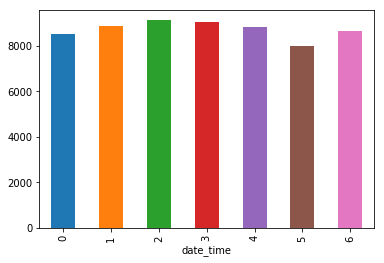

In [27]:
fig, ax = plt.subplots()
d.groupby(d.index.weekday)['EFscale'].count().plot(kind='bar', ax=ax)

### what about the hour of the day

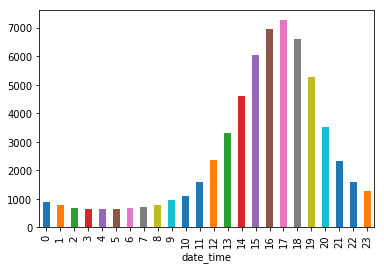

In [28]:
fig, ax = plt.subplots()
d.groupby(d.index.hour)['EFscale'].count().plot(kind='bar', ax=ax)

### what is the average intensity per hour of the day

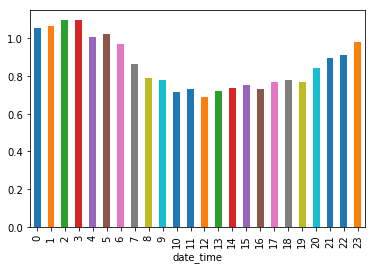

In [29]:
fig, ax = plt.subplots()
d.groupby(d.index.hour)['EFscale'].mean().plot(kind='bar', ax=ax)

### how about the interquartile range

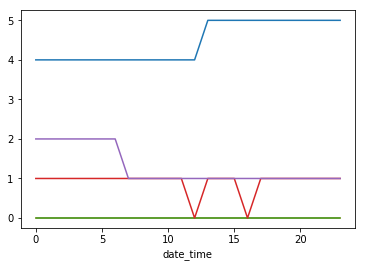

In [30]:
fig, ax = plt.subplots()
d.groupby(d.index.hour)['EFscale'].max().plot(kind='line', ax=ax)
d.groupby(d.index.hour)['EFscale'].min().plot(kind='line', ax=ax)

d.groupby(d.index.hour)['EFscale'].quantile(0.25, interpolation='midpoint').plot(kind='line', ax=ax)
d.groupby(d.index.hour)['EFscale'].quantile(0.5, interpolation='midpoint').plot(kind='line', ax=ax)
d.groupby(d.index.hour)['EFscale'].quantile(0.75, interpolation='midpoint').plot(kind='line', ax=ax)

### length of path?

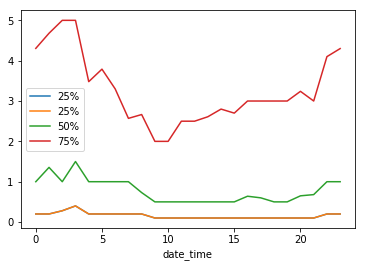

In [31]:
fig, ax = plt.subplots()
# d.groupby(d.index.hour)['widthyards'].max().plot(kind='line', ax=ax)
# d.groupby(d.index.hour)['widthyards'].min().plot(kind='line', ax=ax)

d.groupby(d.index.hour)['lenghtmiles'].quantile(0.25, interpolation='midpoint').plot(kind='line', ax=ax, label='25%')
d.groupby(d.index.hour)['lenghtmiles'].quantile(0.25).plot(kind='line', ax=ax, label='25%')
d.groupby(d.index.hour)['lenghtmiles'].quantile(0.5, interpolation='midpoint').plot(kind='line', ax=ax, label='50%')
d.groupby(d.index.hour)['lenghtmiles'].quantile(0.75, interpolation='midpoint').plot(kind='line', ax=ax, label='75%')
plt.legend()

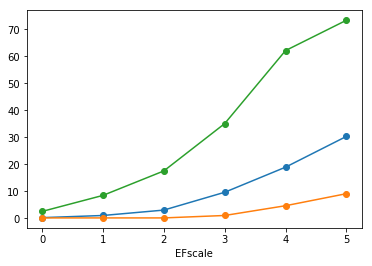

In [32]:
d.groupby(['EFscale'])['lenghtmiles'].quantile(0.5).plot(kind='line',marker='o')
d.groupby(['EFscale'])['lenghtmiles'].quantile(0.1).plot(kind='line',marker='o')
d.groupby(['EFscale'])['lenghtmiles'].quantile(0.9).plot(kind='line',marker='o')

In [33]:
tempd = d.groupby(['EFscale'])['lenghtmiles']
print(type(tempd))

<class 'pandas.core.groupby.SeriesGroupBy'>


In [34]:
tempd.quantile()

EFscale
0     0.2
1     1.0
2     3.0
3     9.6
4    18.9
5    30.3
Name: lenghtmiles, dtype: float64

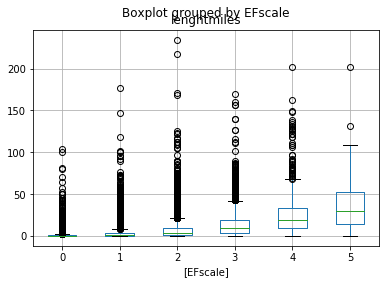

In [35]:
fig, ax = plt.subplots()
d.boxplot(by=['EFscale'], column='lenghtmiles', ax=ax, )

### What if we want to groupby by more than one column?

In [36]:
d.groupby(by=['EFscale',d.index.hour])['om'].count().unstack()

date_time     0      1      2      3      4      5      6      7      8   \
EFscale                                                                    
0          255.0  206.0  189.0  179.0  193.0  182.0  230.0  275.0  332.0   
1          365.0  355.0  287.0  248.0  272.0  290.0  268.0  292.0  288.0   
2          203.0  163.0  163.0  156.0  126.0  137.0  138.0  128.0  107.0   
3           38.0   34.0   42.0   35.0   30.0   24.0   29.0   21.0   31.0   
4            7.0    8.0    2.0    4.0    3.0    4.0    4.0    2.0    1.0   
5            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

date_time     9   ...        14      15      16      17      18      19  \
EFscale           ...                                                     
0          421.0  ...    2279.0  2992.0  3521.0  3624.0  3282.0  2603.0   
1          352.0  ...    1540.0  1942.0  2177.0  2237.0  1984.0  1644.0   
2          148.0  ...     575.0   801.0   928.0   996.0   964.0   723.0   
3           27.0  ...     158.0   215.0   248.0   303.0   284.0   242.0   
4            3.0  ...      45.0    72.0    65.0    90.0    82.0    48.0   
5            NaN  ...       9.0    10.0     8.0    11.0     7.0     4.0   

date_time      20     21     22     23  
EFscale                                 
0          1577.0  969.0  610.0  417.0  
1          1186.0  808.0  606.0  568.0  
2           550.0  411.0  307.0  223.0  
3           176.0  121.0   60.0   61.0  
4            33.0   21.0   13.0   13.0  
5             2.0    1.0    1.0    1.0  

[6 rows x 24 columns]

In [37]:
dd1 = d.groupby(by=[d.index.hour,'EFscale'])['om'].count()#
dd1.head(10)

date_time  EFscale
0          0          255
           1          365
           2          203
           3           38
           4            7
1          0          206
           1          355
           2          163
           3           34
           4            8
Name: om, dtype: int64

In [38]:
dd1.tail()

date_time  EFscale
23         1          568
           2          223
           3           61
           4           13
           5            1
Name: om, dtype: int64

In [39]:
dd2 = dd1.unstack()
dd2

EFscale         0       1      2      3     4     5
date_time                                          
0           255.0   365.0  203.0   38.0   7.0   NaN
1           206.0   355.0  163.0   34.0   8.0   NaN
2           189.0   287.0  163.0   42.0   2.0   NaN
3           179.0   248.0  156.0   35.0   4.0   NaN
4           193.0   272.0  126.0   30.0   3.0   NaN
5           182.0   290.0  137.0   24.0   4.0   NaN
6           230.0   268.0  138.0   29.0   4.0   NaN
7           275.0   292.0  128.0   21.0   2.0   NaN
8           332.0   288.0  107.0   31.0   1.0   NaN
9           421.0   352.0  148.0   27.0   3.0   NaN
10          521.0   402.0  121.0   38.0   5.0   NaN
11          776.0   531.0  204.0   58.0   9.0   NaN
12         1191.0   764.0  313.0   54.0  15.0   NaN
13         1640.0  1126.0  416.0  110.0  18.0   5.0
14         2279.0  1540.0  575.0  158.0  45.0   9.0
15         2992.0  1942.0  801.0  215.0  72.0  10.0
16         3521.0  2177.0  928.0  248.0  65.0   8.0
17         3624.0  2237.0  996.0  303.0  90.0  11.0
18         3282.0  1984.0  964.0  284.0  82.0   7.0
19         2603.0  1644.0  723.0  242.0  48.0   4.0
20         1577.0  1186.0  550.0  176.0  33.0   2.0
21          969.0   808.0  411.0  121.0  21.0   1.0
22          610.0   606.0  307.0   60.0  13.0   1.0
23          417.0   568.0  223.0   61.0  13.0   1.0

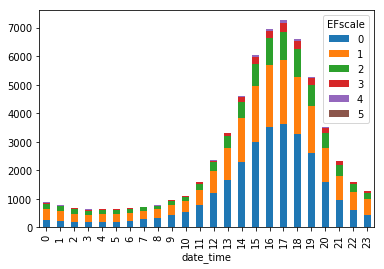

In [40]:
dd2.plot(kind='bar',stacked=True)

In [41]:
dd3 = dd2.mul(1./d.groupby(by=[d.index.hour])['om'].count(), axis=0)
dd3.head()

EFscale           0         1         2         3         4   5
date_time                                                      
0          0.293779  0.420507  0.233871  0.043779  0.008065 NaN
1          0.268930  0.463446  0.212794  0.044386  0.010444 NaN
2          0.276720  0.420205  0.238653  0.061493  0.002928 NaN
3          0.287781  0.398714  0.250804  0.056270  0.006431 NaN
4          0.309295  0.435897  0.201923  0.048077  0.004808 NaN

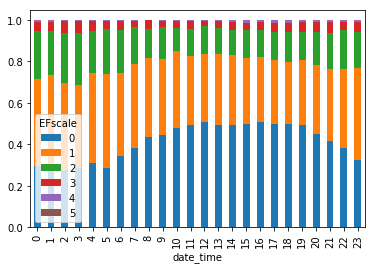

In [42]:
dd3.plot(kind='bar', stacked=True)

### and once again the same analysis but for month of the year

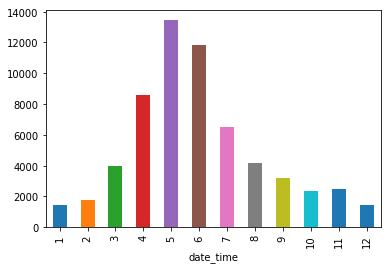

In [43]:
fig, ax = plt.subplots()
d.groupby(d.index.month)['EFscale'].count().plot(kind='bar', ax=ax)

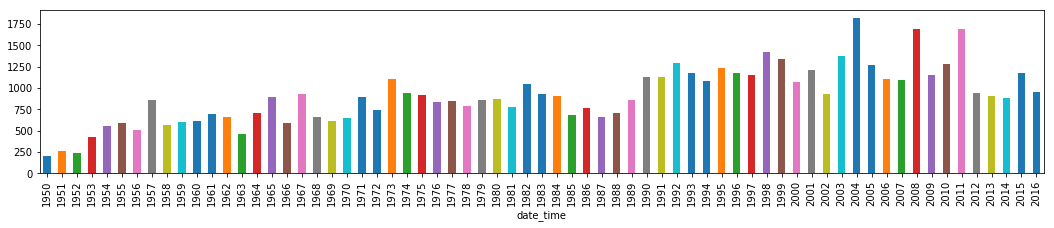

In [44]:
fig, ax = plt.subplots(figsize=(18,3))
d.groupby(d.index.year)['EFscale'].count().plot(kind='bar', ax=ax)

# What else can i do on these groups?

In [45]:
groupbyobject = d.groupby('EFscale')

In [46]:
groupbyobject

# Iterate on groups

In [47]:
# Group the dataframe by regiment, and for each regiment,
for name, group in d.groupby('EFscale'): 
    # print the name of the regiment
    print(name)
    # print the data of that regiment
    print(group.head())


0
                      om    yr  mo  dy     date      time  timezone state  \
date_time                                                                   
1950-03-19 13:15:00   32  1950   3  19  3/19/50  13:15:00         3    LA   
1950-05-01 11:30:00   70  1950   5   1   5/1/50  11:30:00         3    LA   
1950-05-12 17:00:00   99  1950   5  12  5/12/50  17:00:00         3    NC   
1950-05-18 19:00:00  111  1950   5  18  5/18/50  19:00:00         3    KS   
1950-05-19 01:30:00  112  1950   5  19  5/19/50   1:30:00         3    KS   

                     stateFIPS  StateNumber ...  lenghtmiles  widthyards  ns  \
date_time                                   ...                                
1950-03-19 13:15:00         22            8 ...         18.1        27.0   1   
1950-05-01 11:30:00         22           16 ...          1.0       100.0   1   
1950-05-12 17:00:00         37            3 ...          1.0       200.0   1   
1950-05-18 19:00:00         20           13 ...          0

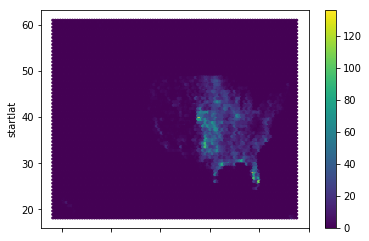

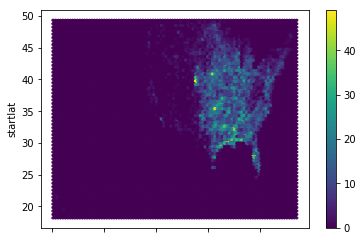

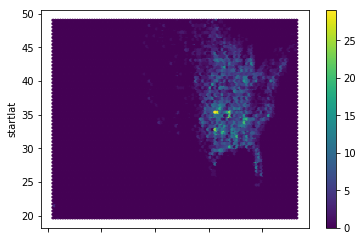

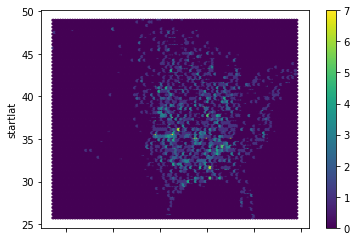

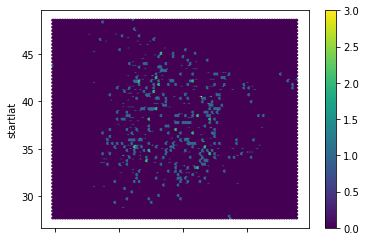

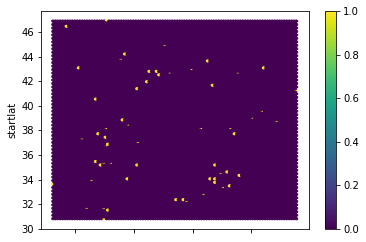

In [48]:
for name, group in d.groupby('EFscale'): 
    # print the name of the regiment
    # print the data of that regiment
    group.plot.hexbin('startlon', 'startlat', cmap='viridis')


# Use your own function with .apply()

In [49]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

In [50]:
d['lenghtmiles'].groupby(d['EFscale']).apply(get_stats).unstack()

count    max       mean   min
EFscale                                 
0        28464.0  103.5   1.030091  0.00
1        20532.0  176.4   3.203892  0.00
2         9001.0  234.7   6.965334  0.06
3         2439.0  169.7  14.906080  0.01
4          567.0  202.1  27.523580  0.10
5           59.0  202.5  39.007797  0.10

# .resample()

### what if I want the time series on a different time resolution, 1 month? 1 hour?

In [51]:
d.resample?

Signature: d.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)
Docstring:
Convenience method for frequency conversion and resampling of time
series.  Object must have a datetime-like index (DatetimeIndex,
PeriodIndex, or TimedeltaIndex), or pass datetime-like values
to the on or level keyword.

Parameters
----------
rule : string
    the offset string or object representing target conversion
axis : int, optional, default 0
closed : {'right', 'left'}
    Which side of bin interval is closed. The default is 'left'
    for all frequency offsets except for 'M', 'A', 'Q', 'BM',
    'BA', 'BQ', and 'W' which all have a default of 'right'.
label : {'right', 'left'}
    Which bin edge label to label bucket with. The default is 'left'
    for all frequency offsets except for 'M', 'A', 'Q', 'BM',
    'BA', 'BQ', and 'W' which all have a default of 'right'.
convention : {'start', 'end',

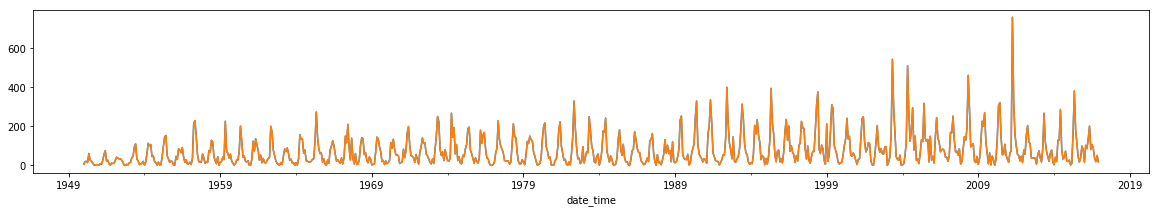

In [52]:
fig, ax = plt.subplots(figsize=(20,3))
d.resample('1m')['om'].count().plot()
d.resample('1M')['om'].count().plot()

In [53]:
d.resample('1MS')['om'].count().head()

date_time
1950-01-01     7
1950-02-01    20
1950-03-01    21
1950-04-01    15
1950-05-01    61
Freq: MS, Name: om, dtype: int64

In [54]:
d.resample('1M')['om'].count().head()

date_time
1950-01-31     7
1950-02-28    20
1950-03-31    21
1950-04-30    15
1950-05-31    61
Freq: M, Name: om, dtype: int64

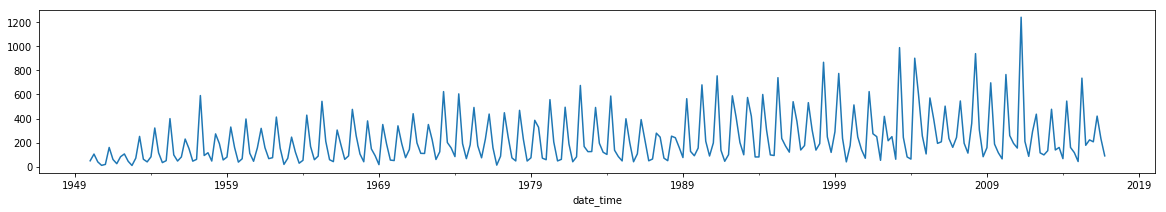

In [55]:
fig, ax = plt.subplots(figsize=(20,3))
d.resample('1QS')['om'].count().plot()

In [56]:
d.resample('1QS')['om'].mean().head()

date_time
1950-01-01     24.5
1950-04-01    100.5
1950-07-01    172.0
1950-10-01    196.5
1951-01-01      9.5
Freq: QS-JAN, Name: om, dtype: float64

In [57]:
d.resample('1QS-DEC')['om'].mean().head()

date_time
1949-12-01     14.00
1950-03-01     76.00
1950-06-01    156.50
1950-09-01    193.00
1950-12-01     54.75
Freq: QS-DEC, Name: om, dtype: float64

# Xarray

In [58]:
step = 1.
to_bin = lambda x: np.round(x / step) * step
d["lat1"] = d.startlat.map(to_bin)
d["lon1"] = d.startlon.map(to_bin)

In [59]:
def to_bin2(x):
    return np.round(x / step) * step
d["lat2"] = d.startlat.map(to_bin2)
d["lon2"] = d.startlon.map(to_bin2)


In [60]:
TD = d[(d['yr']>=2010)&(d['yr']<=2012)].groupby(
            ("lat1", "lon1",pd.Grouper(freq='3H'))).endlon.count()



In [61]:
TD.head()

lat1  lon1    date_time          
18.0  -67.0   2011-08-07 09:00:00    1
              2012-09-13 12:00:00    1
21.0  -158.0  2012-03-09 09:00:00    1
      -156.0  2011-02-11 18:00:00    1
25.0  -80.0   2010-04-26 09:00:00    1
Name: endlon, dtype: int64

In [62]:
type(TD)

pandas.core.series.Series

In [63]:
TD = pd.DataFrame(TD)

In [64]:
dsT = xr.Dataset(TD)

In [65]:
dsT

<xarray.Dataset>
Dimensions:    (dim_0: 2476)
Coordinates:
  * dim_0      (dim_0) MultiIndex
  - lat1       (dim_0) float64 18.0 18.0 21.0 21.0 25.0 25.0 26.0 26.0 26.0 ...
  - lon1       (dim_0) float64 -67.0 -67.0 -158.0 -156.0 -80.0 -80.0 -98.0 ...
  - date_time  (dim_0) datetime64[ns] 2011-08-07T09:00:00 ...
Data variables:
    endlon     (dim_0) int64 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 ...

In [ ]:
dsT = dsT.unstack('dim_0')
dsT

In [ ]:
year = dsT['date_time.year']
year

In [ ]:
dsT1M = dsT.resample(date_time='1MS').sum()

In [ ]:
dsT1M

In [ ]:
dsT1M.sel(lat1=slice(25,50),lon1=slice(-125,-60), date_time=slice('2010-01-01','2010-01-31')).endlon.plot()

In [ ]:
dsT1M.sel(lat1=slice(25,50),lon1=slice(-125,-60)).endlon[0].plot()

### rolling()

In [ ]:
dsT3r = dsT1M.rolling(date_time=3,).sum()

In [1]:
dsT3r

NameError: name 'dsT1M' is not defined

In [ ]:
dsT3r.sel(lat1=slice(25,50),lon1=slice(-125,-60)).endlon[0].plot()

In [ ]:
dsT3r.sel(lat1=slice(25,50),lon1=slice(-125,-60)).endlon[3].plot()